In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
train_df = pd.read_csv("./input/train_data.csv")
test_df = pd.read_csv("./input/test_data.csv")
published_land_price = pd.read_csv("./input/published_land_price.csv")

In [67]:
train_df.head()

,id,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,...,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,y
0,1,中古マンション等,NaN,13101,東京都,千代田区,飯田橋,飯田橋,1,２ＬＤＫ,...,NaN,NaN,NaN,商業地域,80.0,600.0,2017年第４四半期,改装済,NaN,66.0
1,2,中古マンション等,NaN,13101,東京都,千代田区,飯田橋,飯田橋,5,１Ｋ,...,NaN,NaN,NaN,商業地域,80.0,500.0,2017年第４四半期,未改装,NaN,19.0
2,3,中古マンション等,NaN,13101,東京都,千代田区,飯田橋,飯田橋,3,１ＬＤＫ,...,NaN,NaN,NaN,商業地域,80.0,500.0,2017年第３四半期,未改装,NaN,37.0
3,4,中古マンション等,NaN,13101,東京都,千代田区,飯田橋,飯田橋,5,１Ｒ,...,NaN,NaN,NaN,商業地域,80.0,500.0,2017年第３四半期,未改装,NaN,18.0
4,5,宅地(土地と建物),商業地,13101,東京都,千代田区,飯田橋,飯田橋,3,NaN,...,南西,区道,8.0,商業地域,80.0,500.0,2017年第２四半期,NaN,NaN,240.0


In [68]:
test_df.head()

,id,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,...,今後の利用目的,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等
0,1,中古マンション等,NaN,13101,東京都,千代田区,飯田橋,飯田橋,3,１ＬＤＫ,...,住宅,NaN,NaN,NaN,商業地域,80.0,700.0,2018年第４四半期,未改装,NaN
1,2,中古マンション等,NaN,13101,東京都,千代田区,飯田橋,飯田橋,4,１Ｋ,...,住宅,NaN,NaN,NaN,商業地域,80.0,700.0,2018年第３四半期,未改装,NaN
2,3,宅地(土地と建物),商業地,13101,東京都,千代田区,飯田橋,飯田橋,3,NaN,...,事務所,南西,区道,8.0,商業地域,80.0,500.0,2018年第２四半期,NaN,NaN
3,4,中古マンション等,NaN,13101,東京都,千代田区,飯田橋,飯田橋,3,１Ｋ,...,住宅,NaN,NaN,NaN,商業地域,80.0,700.0,2018年第２四半期,未改装,NaN
4,5,中古マンション等,NaN,13101,東京都,千代田区,飯田橋,飯田橋,1,２ＬＤＫ,...,住宅,NaN,NaN,NaN,商業地域,80.0,600.0,2018年第２四半期,未改装,NaN


In [69]:
print("train shape", train_df.shape)
print("test shape", test_df.shape)

train shape (356344, 28)
test shape (34844, 27)


## 欠損値情報

In [60]:
def visualization_lost_value(df):
    
    lost_values_count = []
    lost_values_ratio = []
    
    lost_values = df.isnull().sum()
    
    for i in range(df.shape[1]):
        lost_values_count.append(lost_values[i])
        lost_values_ratio.append(100 * (lost_values[i]/df.shape[0]))
        
    vis_table = pd.DataFrame({"count":lost_values_count,
                              "ratio [%]":lost_values_ratio,
                              "type":df.dtypes},
                             index = df.columns)
    
    return vis_table

In [61]:
visualization_lost_value(train_df)

,count,ratio [%],type
id,0,0.000000,int64
種類,0,0.000000,object
地域,159406,44.733740,object
市区町村コード,0,0.000000,int64
都道府県名,0,0.000000,object
市区町村名,0,0.000000,object
地区名,246,0.069034,object
最寄駅：名称,1551,0.435254,object
最寄駅：距離（分）,10129,2.842478,object
間取り,202568,56.846194,object


In [62]:
visualization_lost_value(test_df)

,count,ratio [%],type
id,0,0.000000,int64
種類,0,0.000000,object
地域,17443,50.060269,object
市区町村コード,0,0.000000,int64
都道府県名,0,0.000000,object
市区町村名,0,0.000000,object
地区名,0,0.000000,object
最寄駅：名称,137,0.393181,object
最寄駅：距離（分）,161,0.462059,object
間取り,18193,52.212720,object


## 型変換

In [ ]:
#

In [63]:
def change_type(df):
    df["最寄駅：距離（分）"] = df["最寄駅：距離（分）"].astype("float64")
    df["面積（㎡）"] = df["面積（㎡）"].astype("float64")
    df["間口"] = df["間口"].astype("float64")
    df["延床面積（㎡）"] = df["延床面積（㎡）"].astype("float64")
    
    return df

In [64]:
change_type(train_df)

ValueError: could not convert string to float: '30分?60分'

In [ ]:
change_type(train_df)

## データ可視化

### 各種統計量

In [10]:
train_df.describe()

,id,市区町村コード,前面道路：幅員（ｍ）,建ぺい率（％）,容積率（％）,y
count,356344.000000,356344.000000,193279.000000,350958.000000,350958.000000,356344.000000
mean,178172.500000,13140.019052,6.257812,62.005482,264.106360,65.434766
std,102867.796499,46.206047,4.902258,13.125221,159.418252,315.011339
min,1.000000,13101.000000,1.000000,30.000000,50.000000,0.000500
25%,89086.750000,13110.000000,4.000000,60.000000,150.000000,21.000000
50%,178172.500000,13117.000000,5.000000,60.000000,200.000000,35.000000
75%,267258.250000,13201.000000,6.000000,80.000000,300.000000,53.000000
max,356344.000000,13421.000000,90.000000,80.000000,1300.000000,61000.000000


In [11]:
test_df.describe()

,id,市区町村コード,前面道路：幅員（ｍ）,建ぺい率（％）,容積率（％）
count,34844.000000,34844.000000,17078.000000,34459.000000,34459.000000
mean,17422.500000,13139.619303,6.182621,62.844540,272.524449
std,10058.740726,46.490982,4.650610,13.207271,160.983387
min,1.000000,13101.000000,1.000000,30.000000,50.000000
25%,8711.750000,13110.000000,4.000000,60.000000,150.000000
50%,17422.500000,13116.000000,5.000000,60.000000,200.000000
75%,26133.250000,13201.000000,6.000000,80.000000,400.000000
max,34844.000000,13421.000000,55.000000,80.000000,1000.000000


### ターゲットの分布

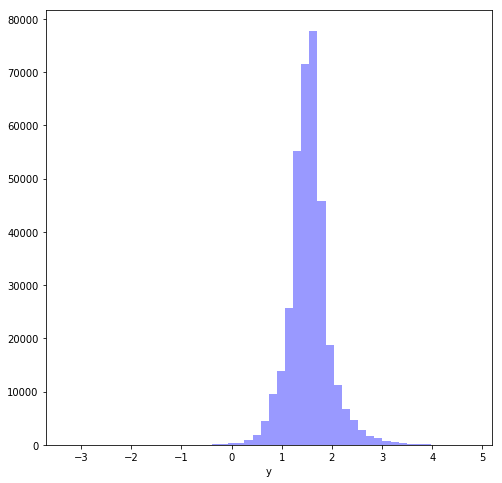

In [38]:
plt.figure(figsize=(8, 8))
sns.distplot(np.log10(train_df['y']), kde = False, bins = 50, color='blue')

### 不動産の種類

In [22]:
#train
print("種類一覧", train_df["種類"].unique())
print("種類数：", len(train_df["種類"].unique()))

種類一覧 ['中古マンション等' '宅地(土地と建物)' '宅地(土地)' '林地' '農地']
種類数： 5


In [23]:
#test
print("種類一覧", test_df["種類"].unique())
print("種類数：", len(test_df["種類"].unique()))

種類一覧 ['中古マンション等' '宅地(土地と建物)' '宅地(土地)' '林地' '農地']
種類数： 5


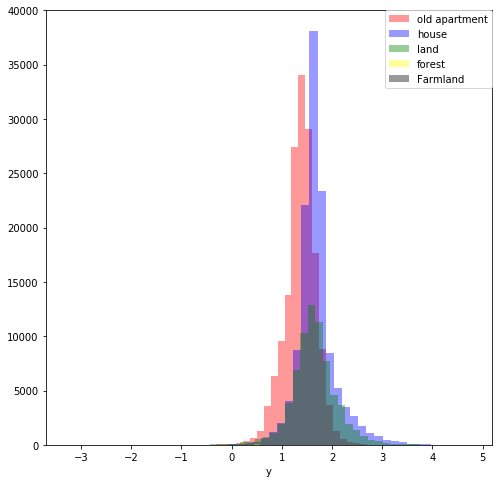

In [37]:
#種類と家賃の関係
plt.figure(figsize=(8, 8))

sns.distplot(np.log10(train_df[train_df["種類"] == "中古マンション等"]["y"]), kde = False,
             bins = 50, color='red', label = "old apartment")

sns.distplot(np.log10(train_df[train_df["種類"] == "宅地(土地と建物)"]["y"]), kde = False,
             bins = 50, color='blue', label = "house")

sns.distplot(np.log10(train_df[train_df["種類"] == "宅地(土地)"]["y"]), kde = False,
             bins = 50, color='green', label = "land")

sns.distplot(np.log10(train_df[train_df["種類"] == "林地"]["y"]), kde = False,
             bins = 50, color='yellow', label = "forest")

sns.distplot(np.log10(train_df[train_df["種類"] == "農地"]["y"]), kde = False,
             bins = 50, color='black', label = "Farmland")

plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=10)

### 市区町村コードと市区町村名の関係

In [17]:
#train
print("市区町村コード一覧", train_df["市区町村コード"].unique())
print("市区町村コード数：", len(train_df["市区町村コード"].unique()))

市区町村コード一覧 [13101 13102 13103 13104 13105 13106 13107 13108 13109 13110 13111 13112
 13113 13114 13115 13116 13117 13118 13119 13120 13121 13122 13123 13201
 13202 13203 13204 13205 13206 13207 13208 13209 13210 13211 13212 13213
 13214 13215 13218 13219 13220 13221 13222 13223 13224 13225 13227 13228
 13229 13303 13305 13307 13308 13361 13363 13364 13381 13401 13421]
市区町村コード数： 59


In [19]:
#train
print("市区町村一覧", train_df["市区町村名"].unique())
print("市区町村数：", len(train_df["市区町村名"].unique()))

市区町村一覧 ['千代田区' '中央区' '港区' '新宿区' '文京区' '台東区' '墨田区' '江東区' '品川区' '目黒区' '大田区' '世田谷区'
 '渋谷区' '中野区' '杉並区' '豊島区' '北区' '荒川区' '板橋区' '練馬区' '足立区' '葛飾区' '江戸川区' '八王子市'
 '立川市' '武蔵野市' '三鷹市' '青梅市' '府中市' '昭島市' '調布市' '町田市' '小金井市' '小平市' '日野市'
 '東村山市' '国分寺市' '国立市' '福生市' '狛江市' '東大和市' '清瀬市' '東久留米市' '武蔵村山市' '多摩市' '稲城市'
 '羽村市' 'あきる野市' '西東京市' '西多摩郡瑞穂町' '西多摩郡日の出町' '西多摩郡檜原村' '西多摩郡奥多摩町' '大島町'
 '新島村' '神津島村' '三宅村' '八丈町' '小笠原村']
市区町村数： 59


In [20]:
#test
print("市区町村コード一覧", test_df["市区町村コード"].unique())
print("市区町村コード数：", len(test_df["市区町村コード"].unique()))

市区町村コード一覧 [13101 13102 13103 13104 13105 13106 13107 13108 13109 13110 13111 13112
 13113 13114 13115 13116 13117 13118 13119 13120 13121 13122 13123 13201
 13202 13203 13204 13205 13206 13207 13208 13209 13210 13211 13212 13213
 13214 13215 13218 13219 13220 13221 13222 13223 13224 13225 13227 13228
 13229 13303 13305 13307 13308 13361 13363 13381 13401 13421]
市区町村コード数： 58


In [21]:
#test
print("市区町村一覧", test_df["市区町村名"].unique())
print("市区町村数：", len(test_df["市区町村名"].unique()))

市区町村一覧 ['千代田区' '中央区' '港区' '新宿区' '文京区' '台東区' '墨田区' '江東区' '品川区' '目黒区' '大田区' '世田谷区'
 '渋谷区' '中野区' '杉並区' '豊島区' '北区' '荒川区' '板橋区' '練馬区' '足立区' '葛飾区' '江戸川区' '八王子市'
 '立川市' '武蔵野市' '三鷹市' '青梅市' '府中市' '昭島市' '調布市' '町田市' '小金井市' '小平市' '日野市'
 '東村山市' '国分寺市' '国立市' '福生市' '狛江市' '東大和市' '清瀬市' '東久留米市' '武蔵村山市' '多摩市' '稲城市'
 '羽村市' 'あきる野市' '西東京市' '西多摩郡瑞穂町' '西多摩郡日の出町' '西多摩郡檜原村' '西多摩郡奥多摩町' '大島町'
 '新島村' '三宅村' '八丈町' '小笠原村']
市区町村数： 58


In [44]:
#市区町村と不動産価格の関係
city_mean_y = []

for city in list(train_df["市区町村名"].unique()):
    city_mean_y.append(train_df[train_df["市区町村名"] == city]["y"].sum()/len(train_df[train_df["市区町村名"] == city]["y"]))
    
mean_y_table = pd.DataFrame({"平均不動産価格":city_mean_y},
                            index = list(train_df["市区町村名"].unique()))

mean_y_table = mean_y_table.sort_values("平均不動産価格", ascending = False)

mean_y_table

,平均不動産価格
千代田区,222.837109
港区,168.006760
渋谷区,145.303210
中央区,136.995301
目黒区,89.937490
武蔵野市,85.713897
新宿区,79.985966
台東区,78.146769
世田谷区,76.316458
三鷹市,71.298829


### 最寄駅までの距離と不動産価格

In [53]:
near_mean_y = []

for minute in list(train_df["最寄駅：距離（分）"].unique()):
    near_mean_y.append(train_df[train_df["最寄駅：距離（分）"] == minute]["y"].sum()/len(train_df[train_df["最寄駅：距離（分）"] == minute]["y"]))
    
mean_y_table = pd.DataFrame({"平均不動産価格":near_mean_y},
                            index = list(train_df["最寄駅：距離（分）"].unique()))

mean_y_table = mean_y_table.sort_values("平均不動産価格", ascending = False)

mean_y_table

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


,平均不動産価格
1,117.822674
2,103.409290
0,97.383038
3,89.895928
4,87.030582
6,72.092362
5,69.906315
7,67.089797
9,64.061175
8,63.733804


### 面積と不動産価格

dtype('int64')